EDA Notebook on NLPGrid Twitter Data

Topics:
- Number of Tweets Per Bank
- Distribution of Tweets Over Dates Per Bank
- Overall Distribution of Tweet Posting Times
- Overall Distribution of User Follower Counts
- Percentage of Posts that are Retweets

In [14]:
# File Paths
dir_path = "/Users/shivamenta/Desktop/formatted_twitter_data/"

!pip3 install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [15]:
import os
import json
import datetime
from collections import Counter

bank_lines = {}
bank_months = {}
tweet_hours = Counter()
followers = []
total_count = retweet_count = 0

# Read In All Data
for subdir in os.listdir(dir_path):
    file_path = os.path.join(dir_path, subdir)
    if os.path.isfile(file_path) and subdir != ".DS_Store":
        with open(file_path, 'r') as f:
            tweets = json.load(f)
            # Bank Lines
            bank_lines[subdir] = len(tweets)
            total_count += len(tweets)
            bank_months[subdir] = Counter()

            for data in tweets:
                # Parse Datetime
                if "created_date" in data:
                    date = datetime.datetime.strptime(data["created_date"], '%Y-%m-%d')
                    bank_months[subdir][date.strftime("%Y-%m")] += 1
                if "created_time" in data:
                    time = datetime.datetime.strptime(data["created_time"], '%H:%M:%S')
                    tweet_hours[time.hour] += 1

                followers.append(data.get("user_followers", 0))
                if "text" in data and data["text"][0:2] == "RT":
                    retweet_count += 1

In [16]:
# Tweets Per Bank
for bank in bank_lines:
    print(f"{bank}: {bank_lines[bank]} tweets.")

# Percentage Retweets
print(f"{round((100.0 * retweet_count / total_count), 2)}% of tweets were retweets (starting with RT).")

tennesse_commerce.json: 32869 tweets.
umb_financial.json: 594 tweets.
northern_trust.json: 4315 tweets.
allied_bank.json: 532 tweets.
amarillo_national.json: 82 tweets.
keycorp.json: 3018 tweets.
valley_national.json: 4254 tweets.
superior_bank.json: 166 tweets.
bok_financial.json: 510 tweets.
riverside_national_bank.json: 186 tweets.
horizon_bank.json: 234 tweets.
prosperity_bancshares.json: 415 tweets.
integra_bank.json: 72866 tweets.
fcb.json: 408213 tweets.
us_bank.json: 23405 tweets.
capital_one.json: 34240 tweets.
first_nbc.json: 38956 tweets.
cullen_frost.json: 642 tweets.
pinnacle_financial.json: 1491 tweets.
fulton_financial.json: 476 tweets.
huntington_bank.json: 1915 tweets.
truist.json: 11278 tweets.
sun_west_bank.json: 1 tweets.
regions_bank.json: 2760 tweets.
ally_bank.json: 2588 tweets.
associated_banccorp.json: 17 tweets.
la_jolla_bank.json: 28 tweets.
first_regional_bank.json: 22 tweets.
community_central_bank.json: 10 tweets.
bank_ozarks.json: 235 tweets.
bny_mellon.j

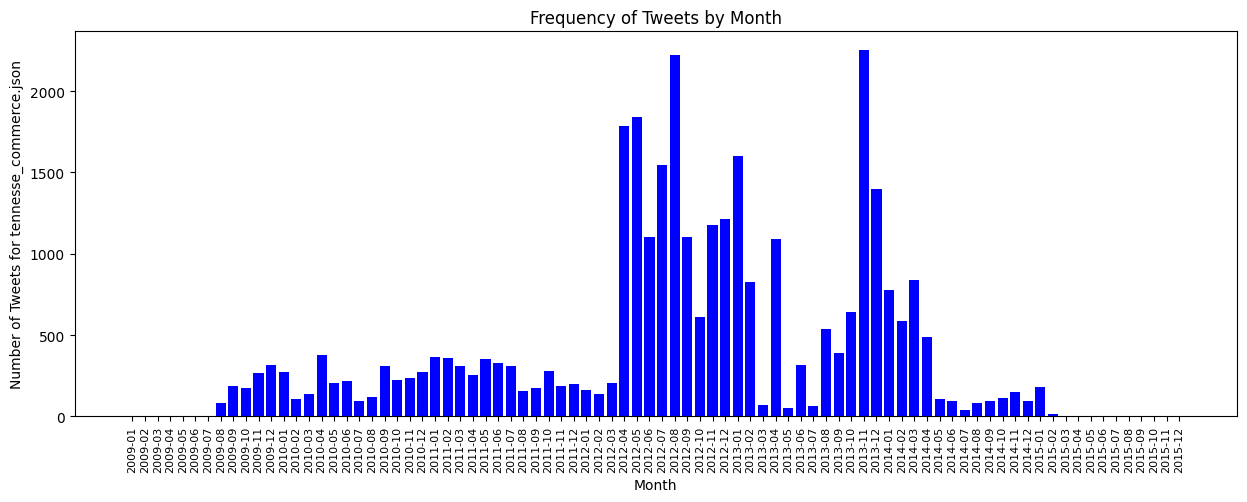

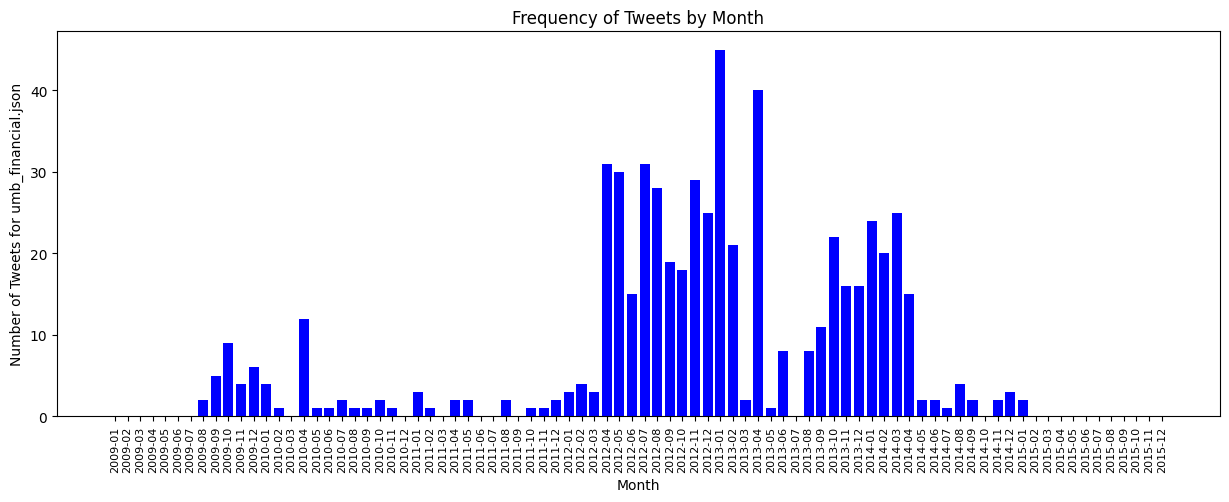

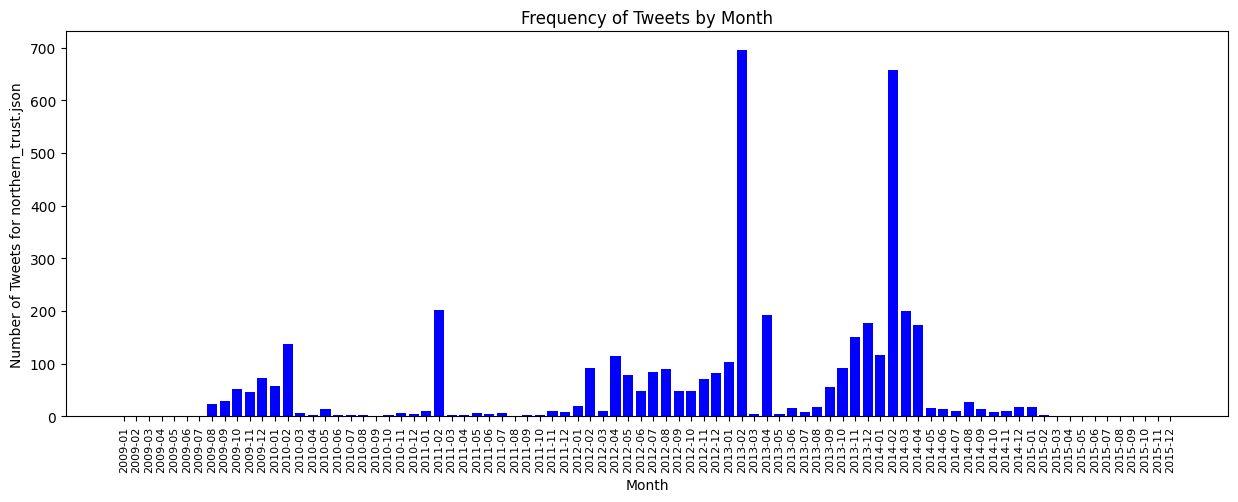

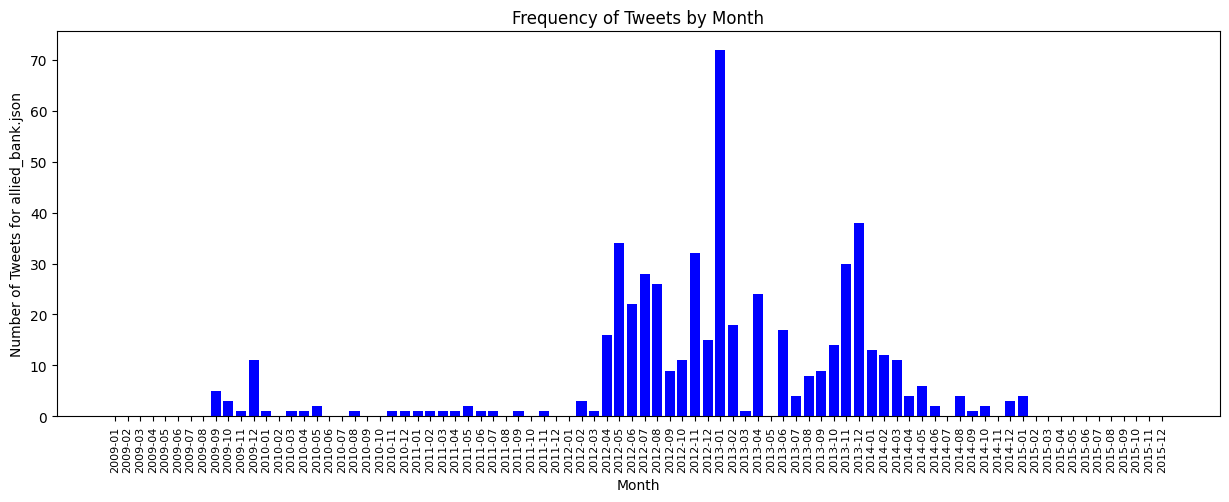

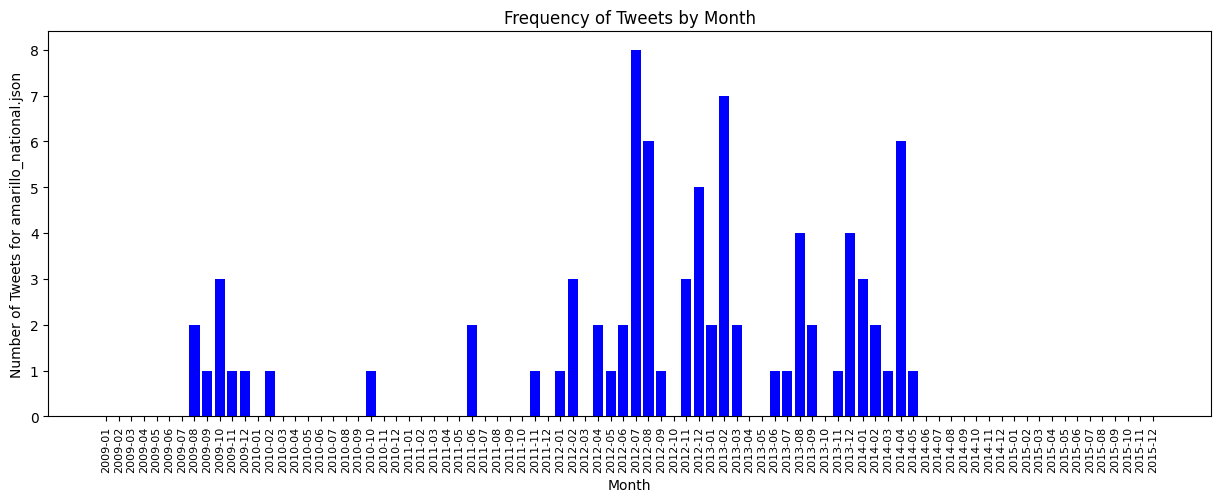

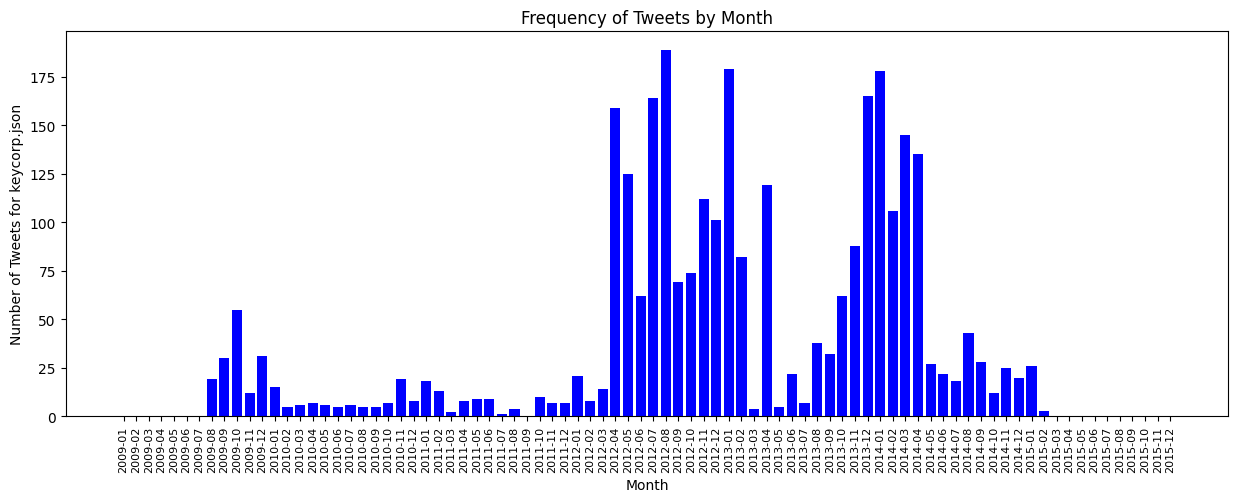

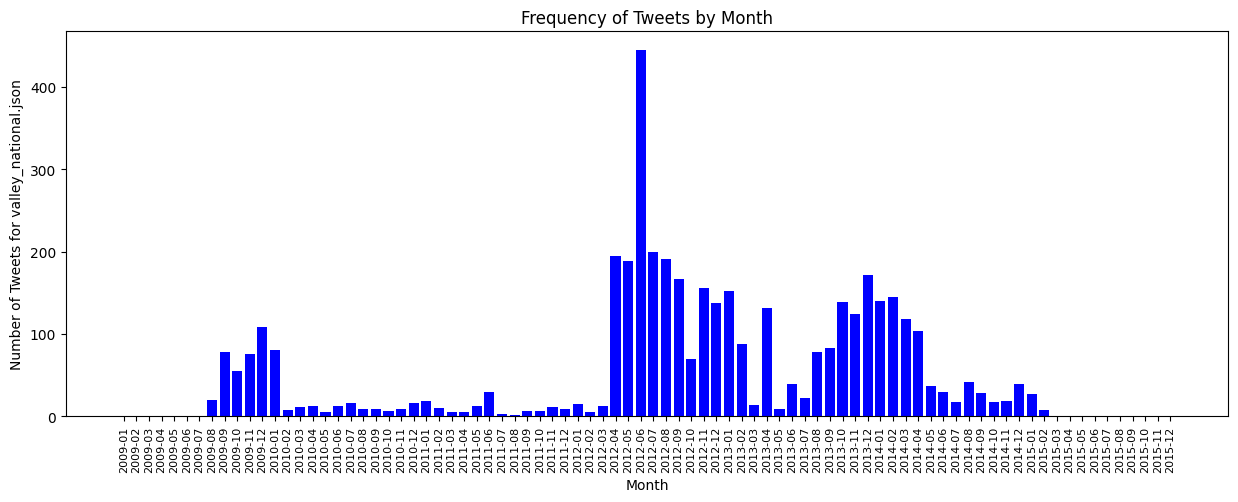

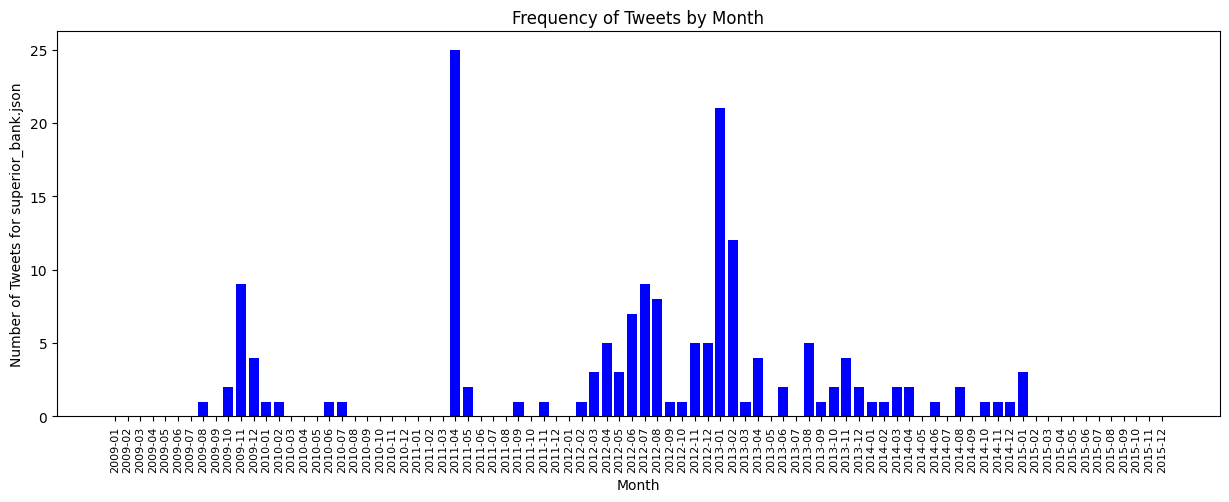

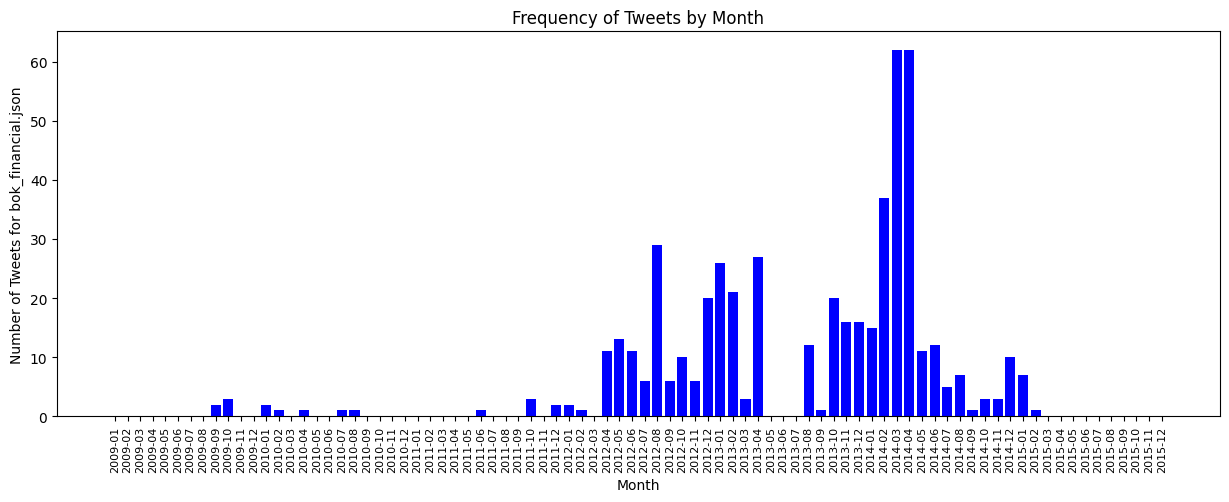

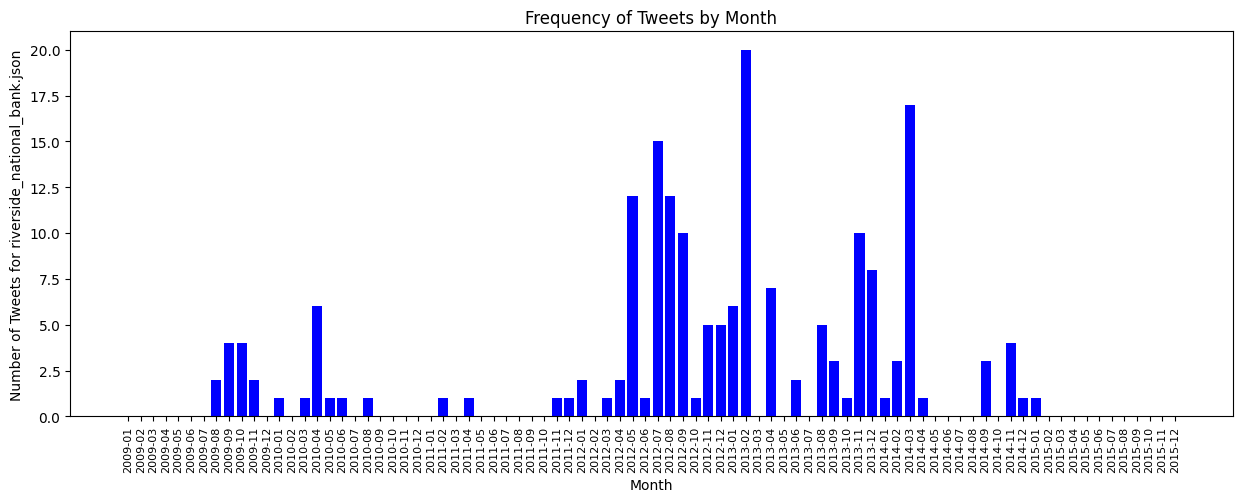

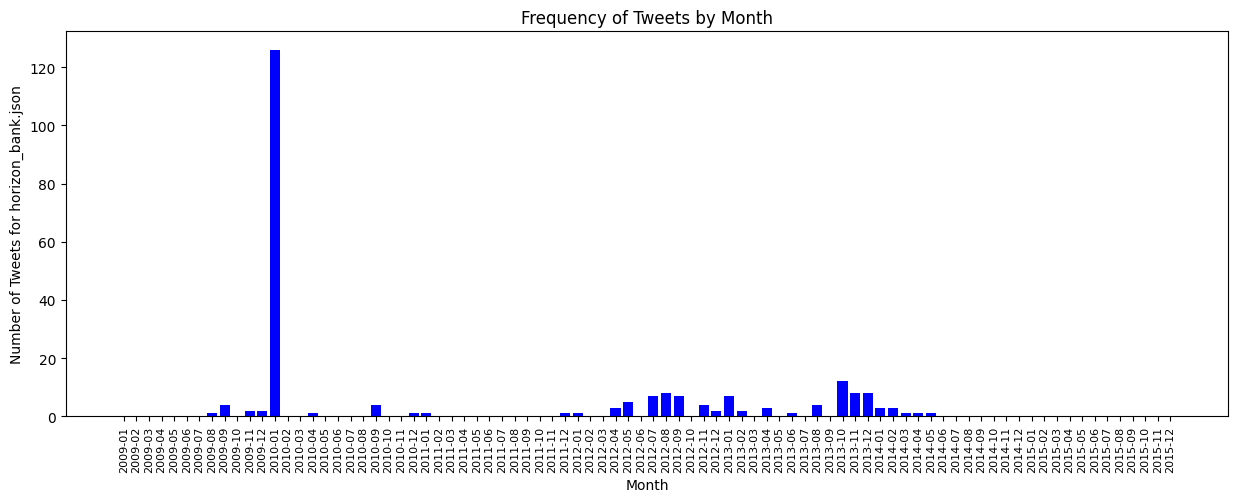

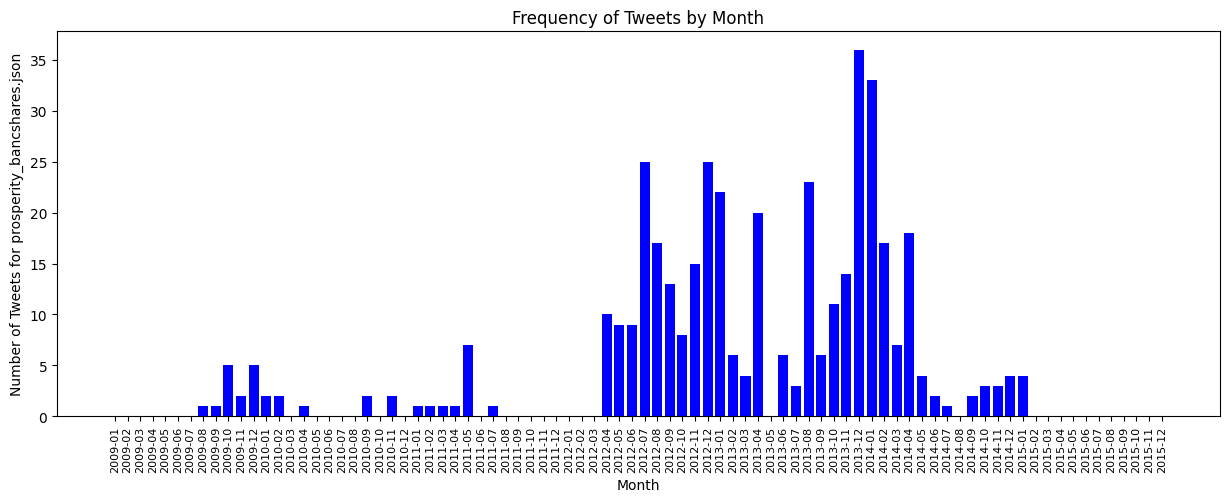

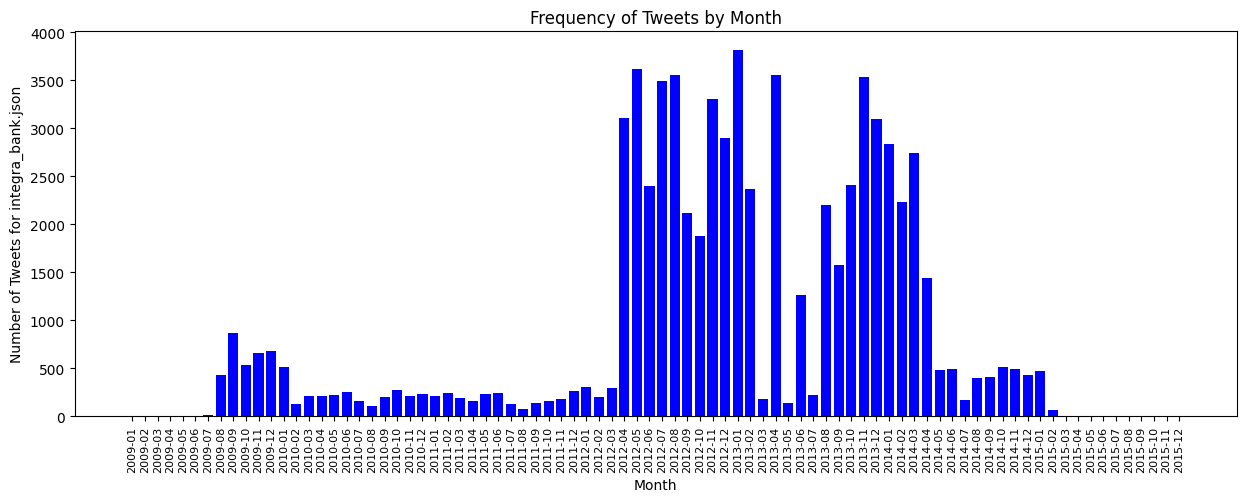

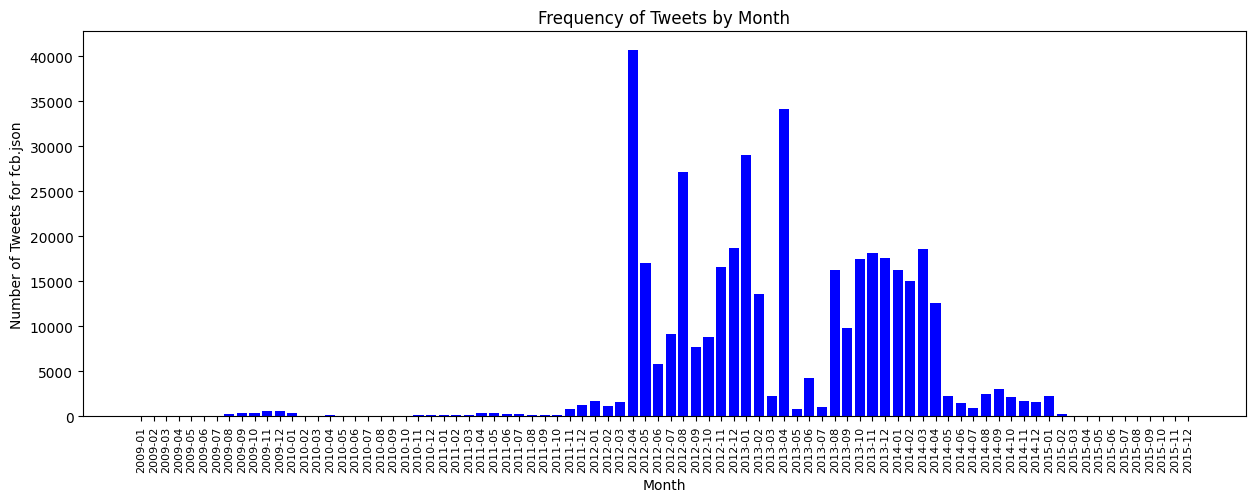

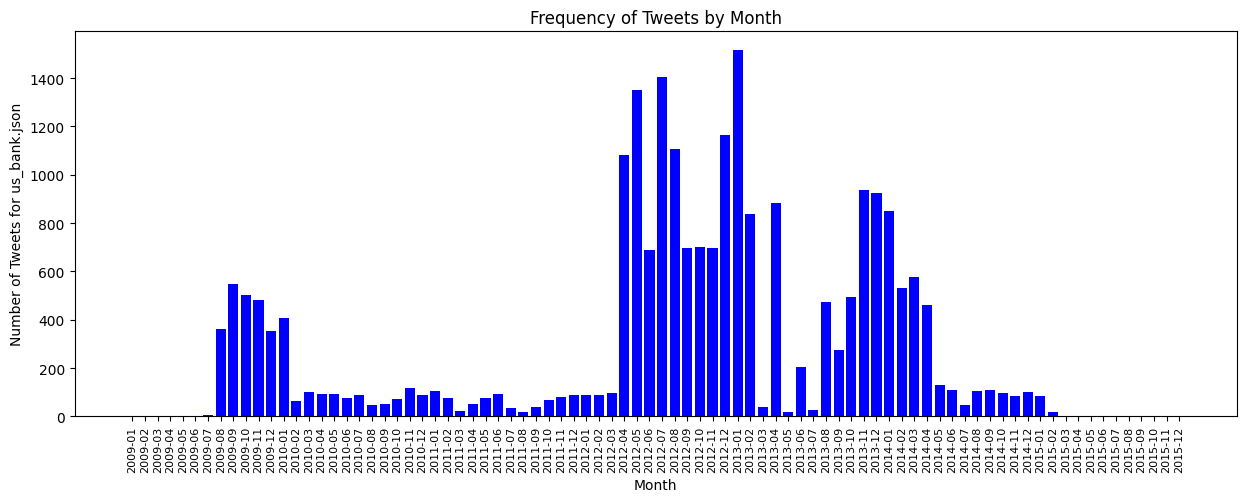

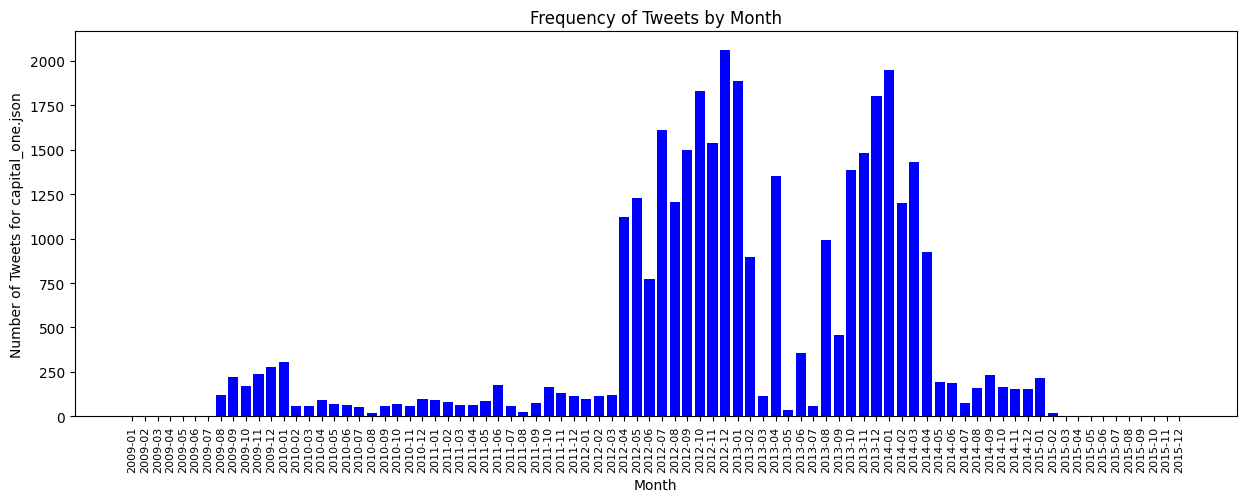

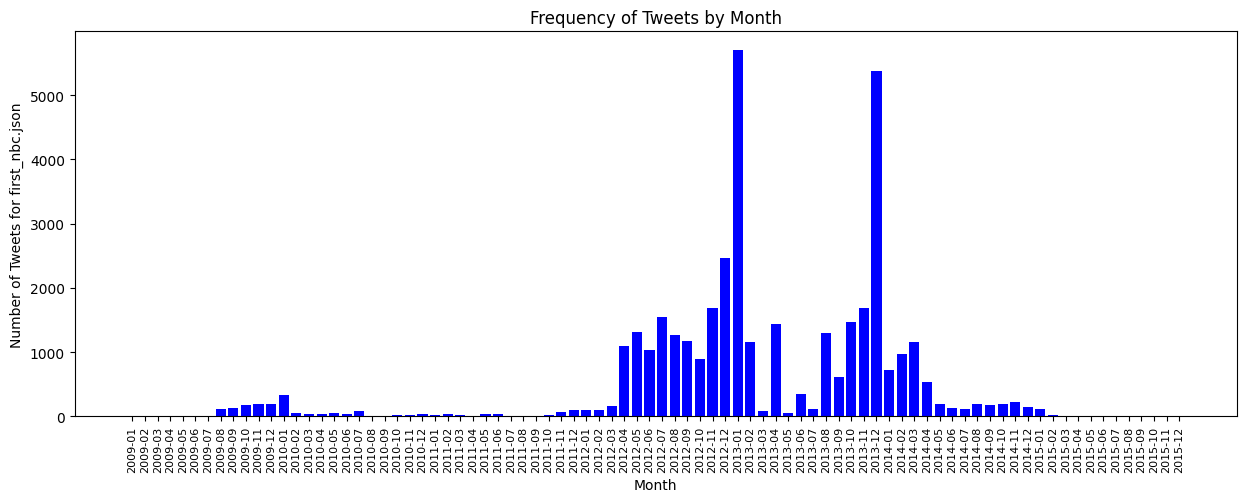

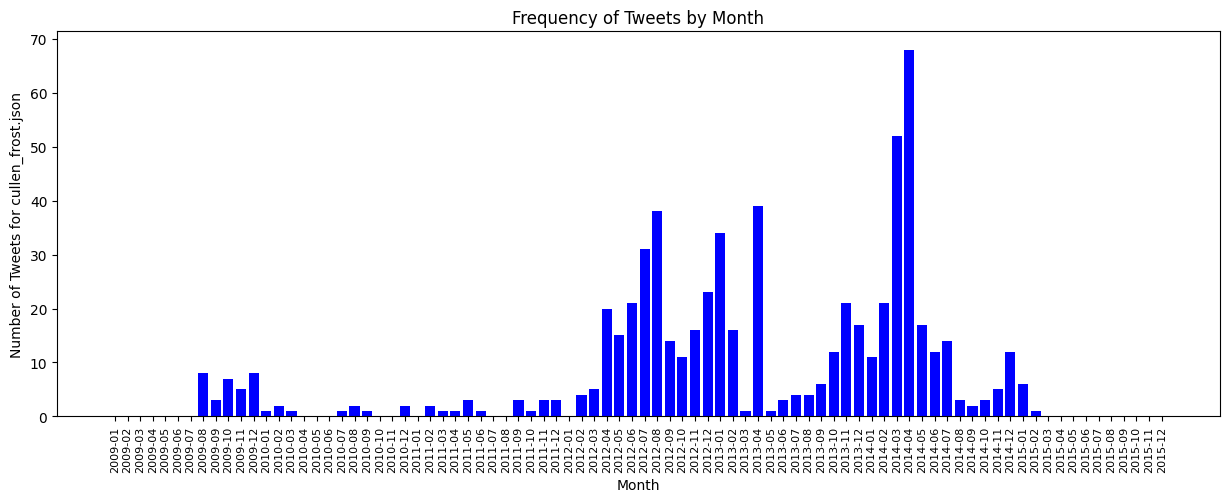

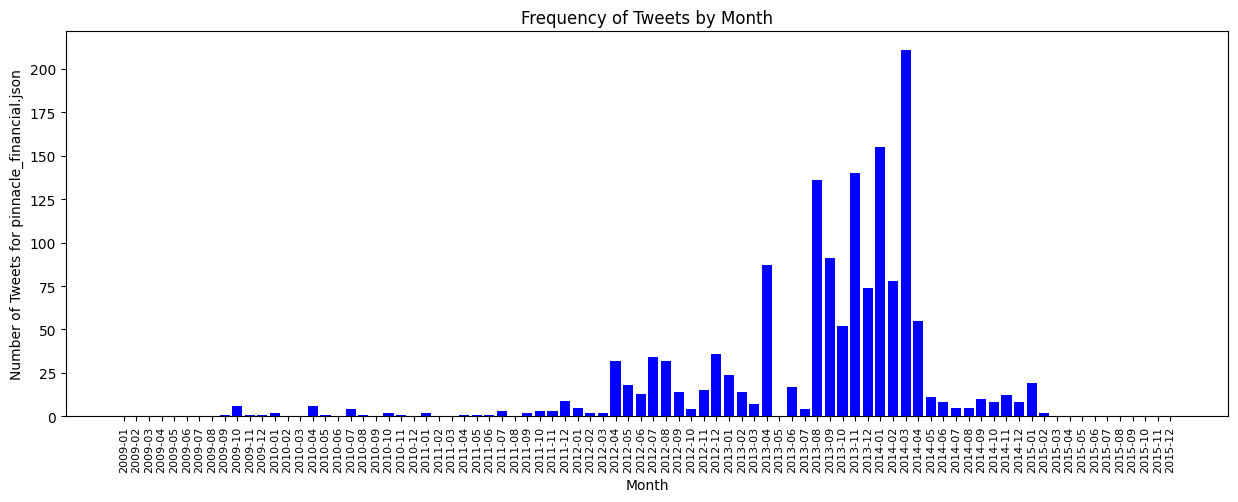

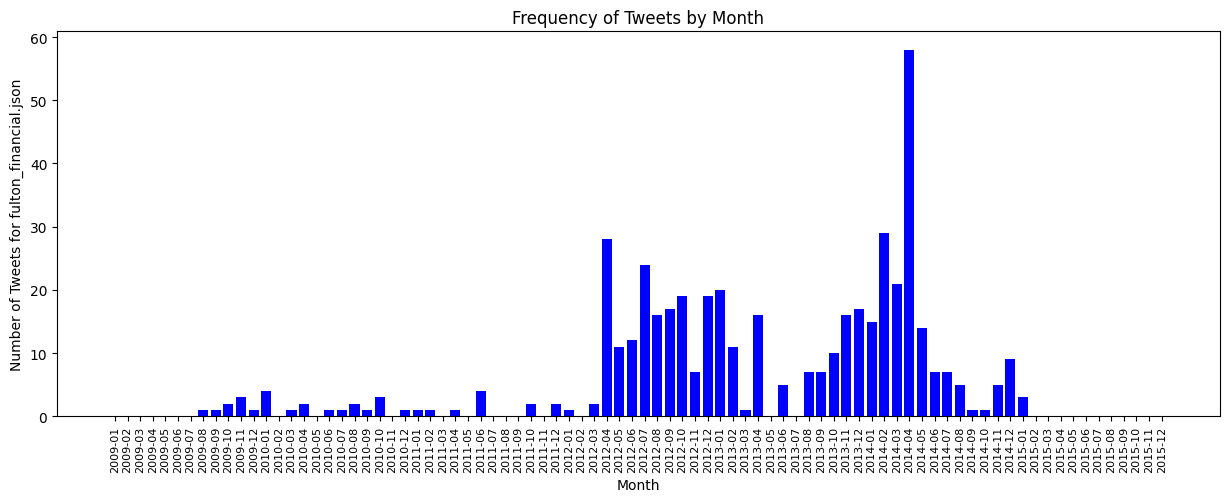

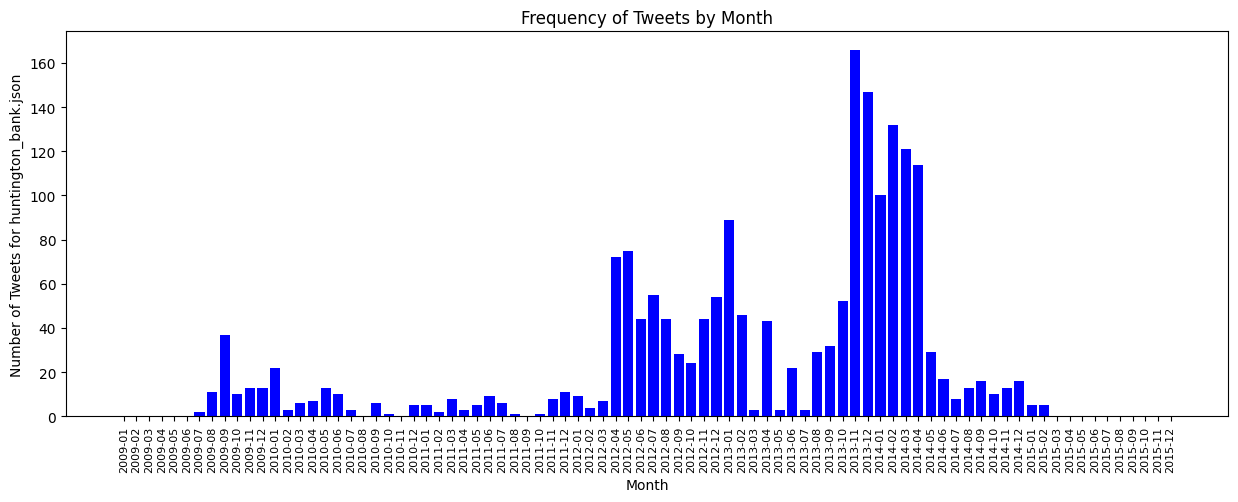

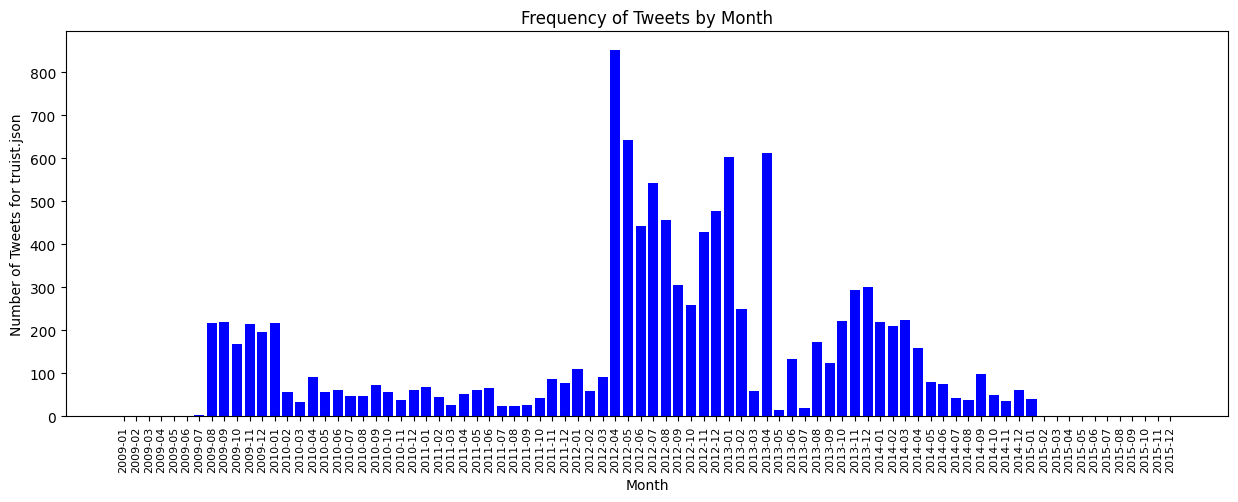

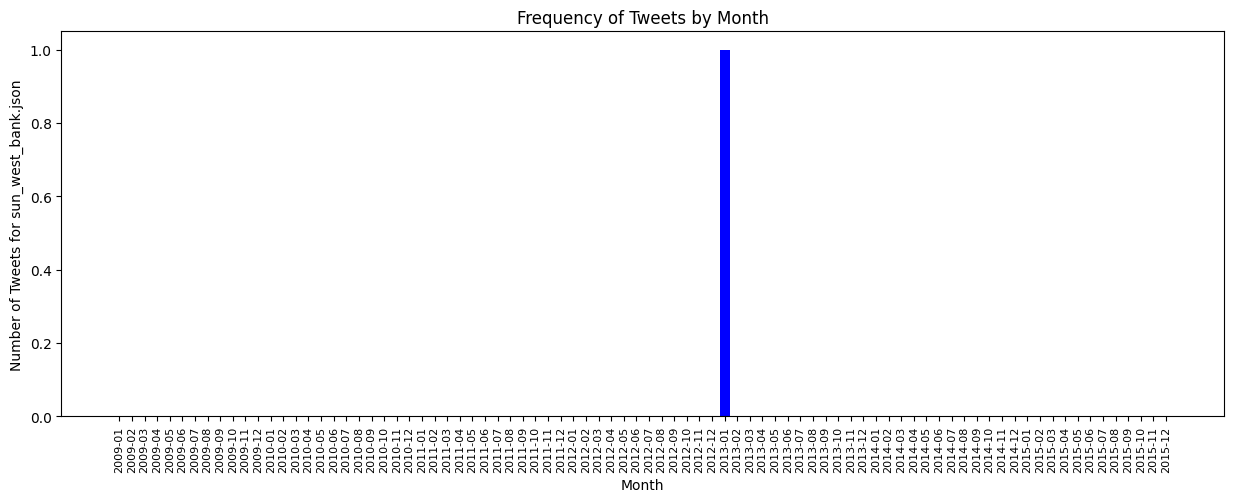

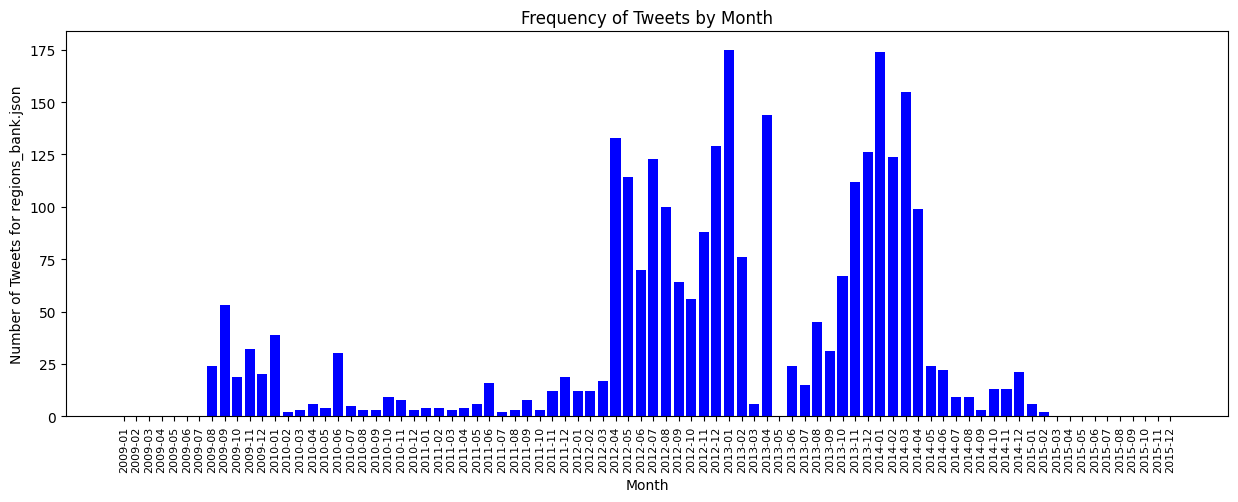

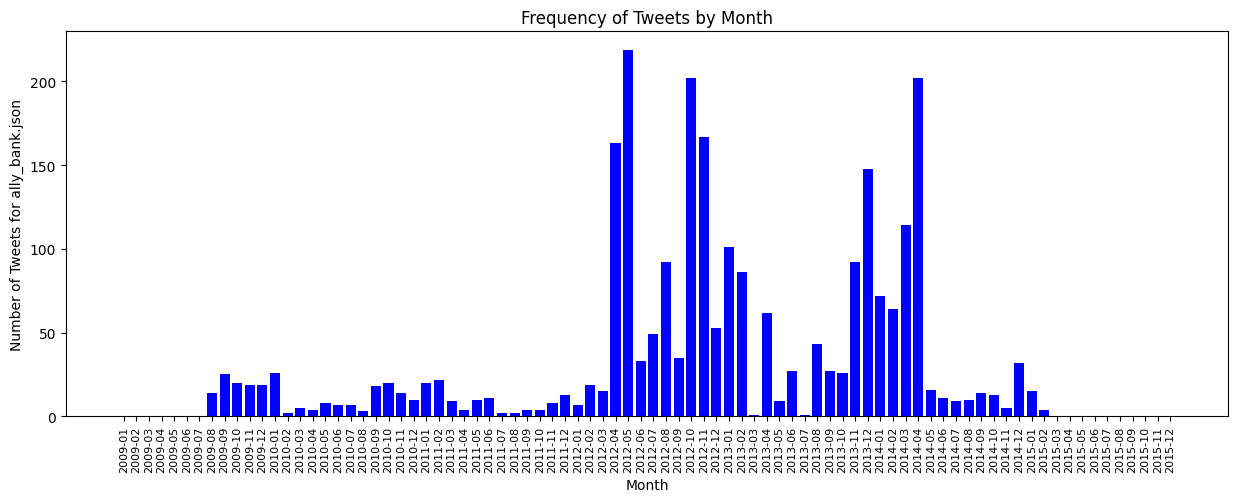

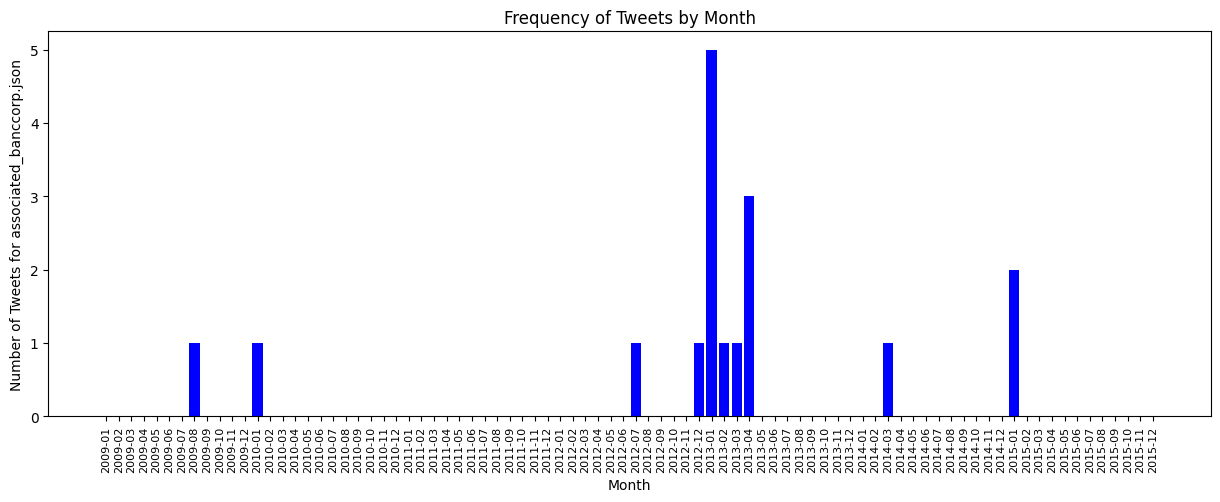

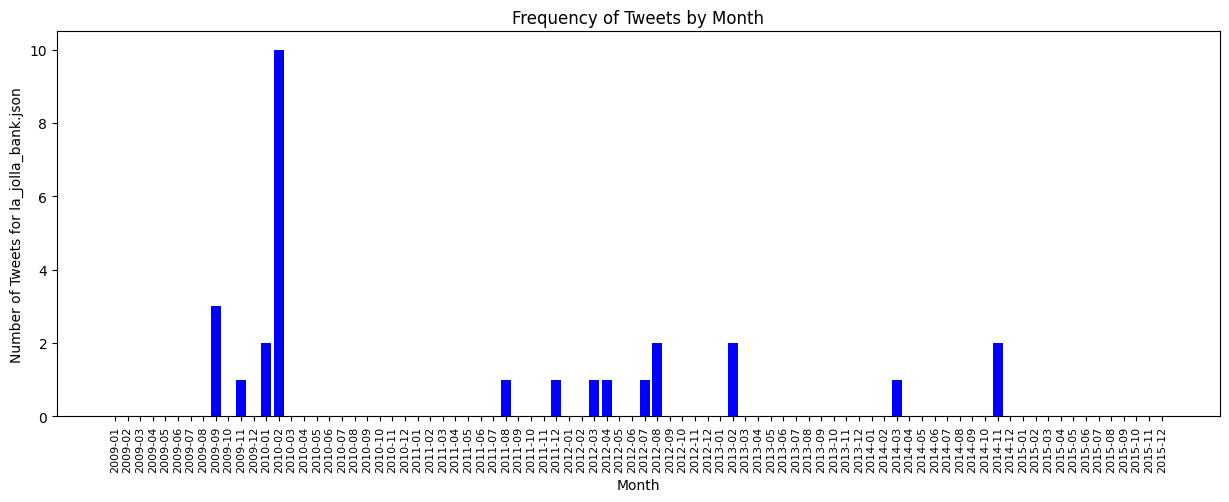

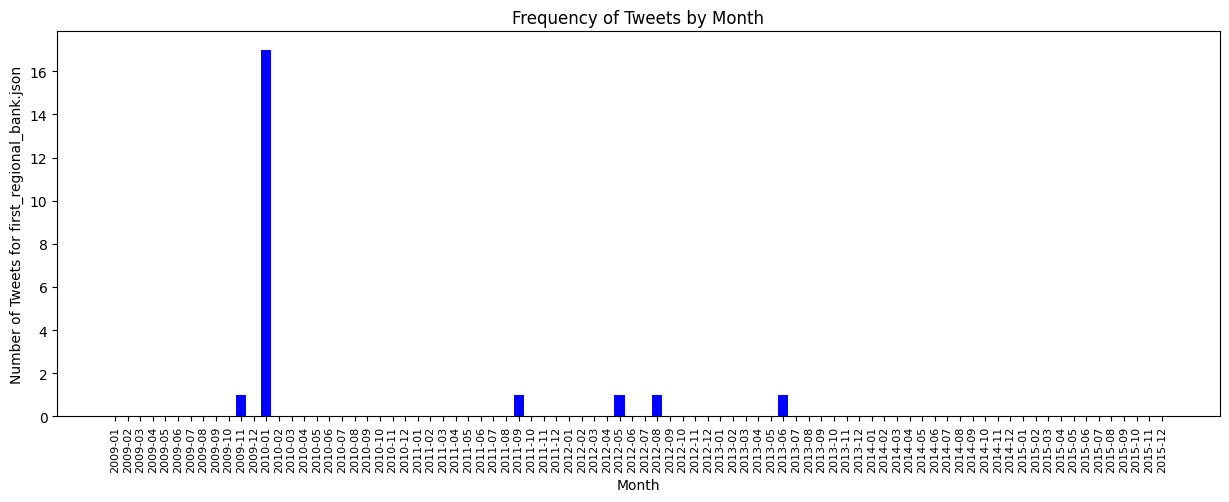

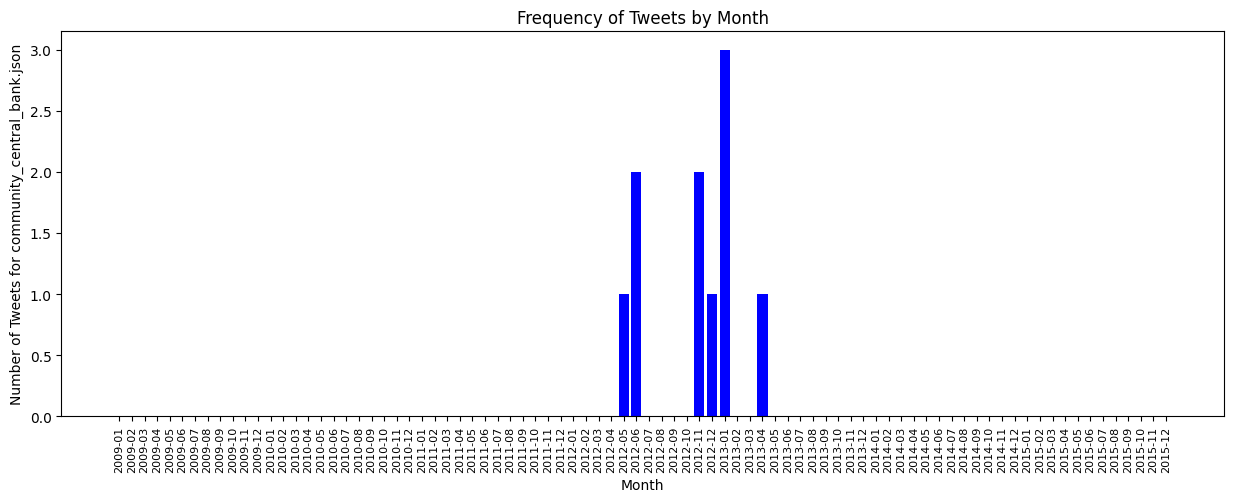

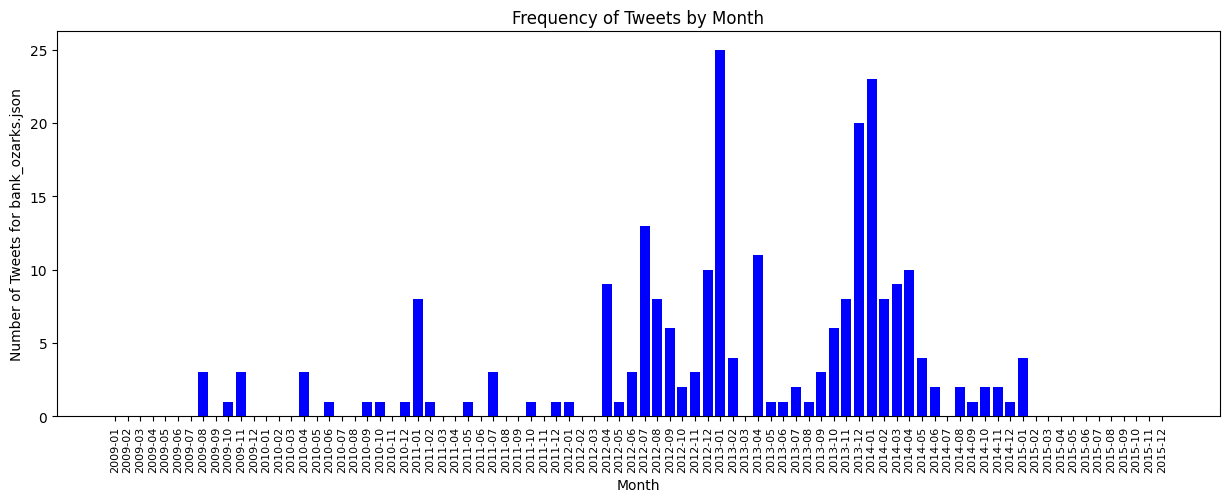

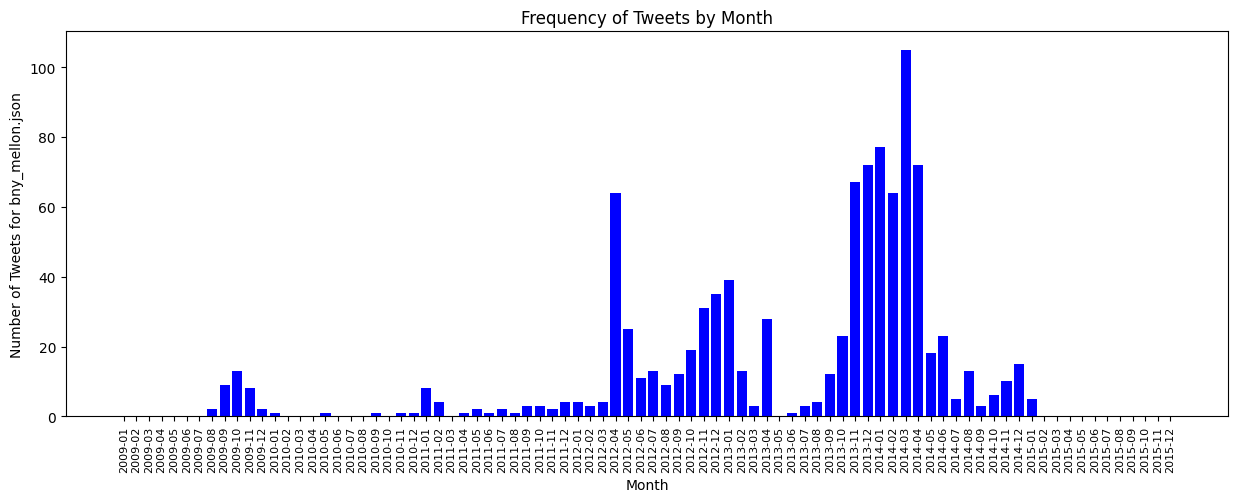

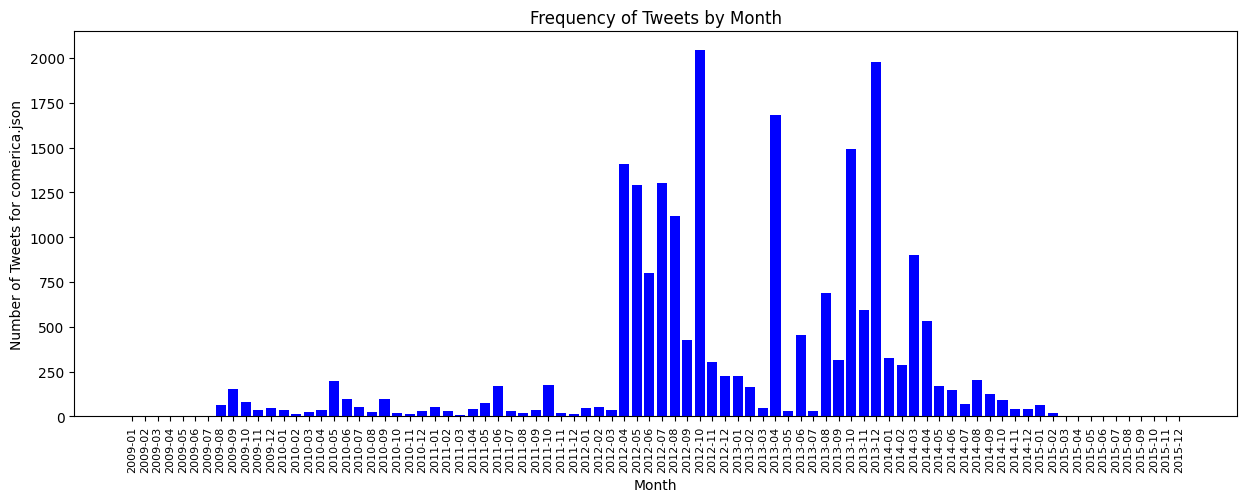

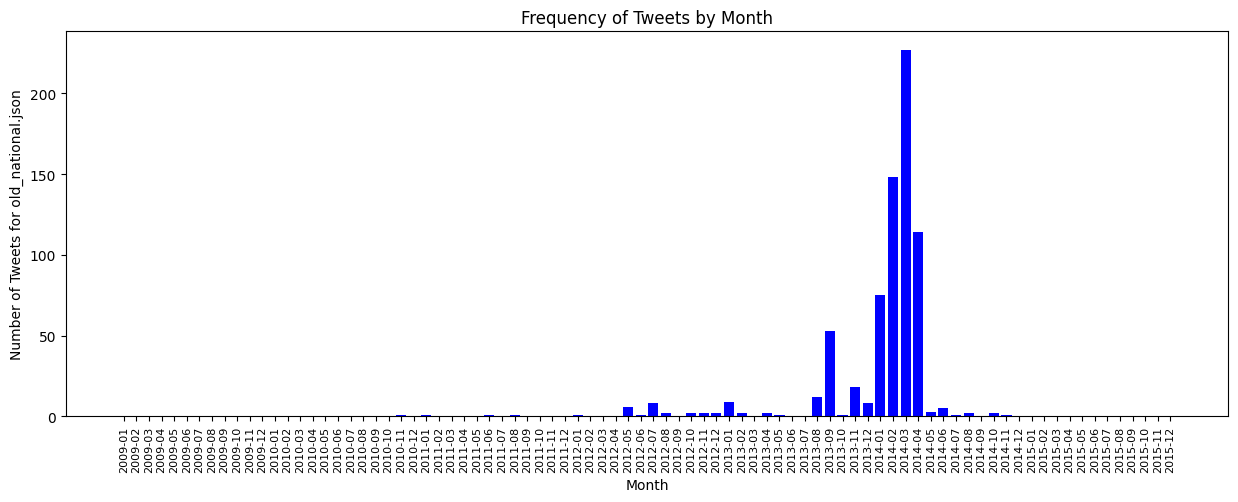

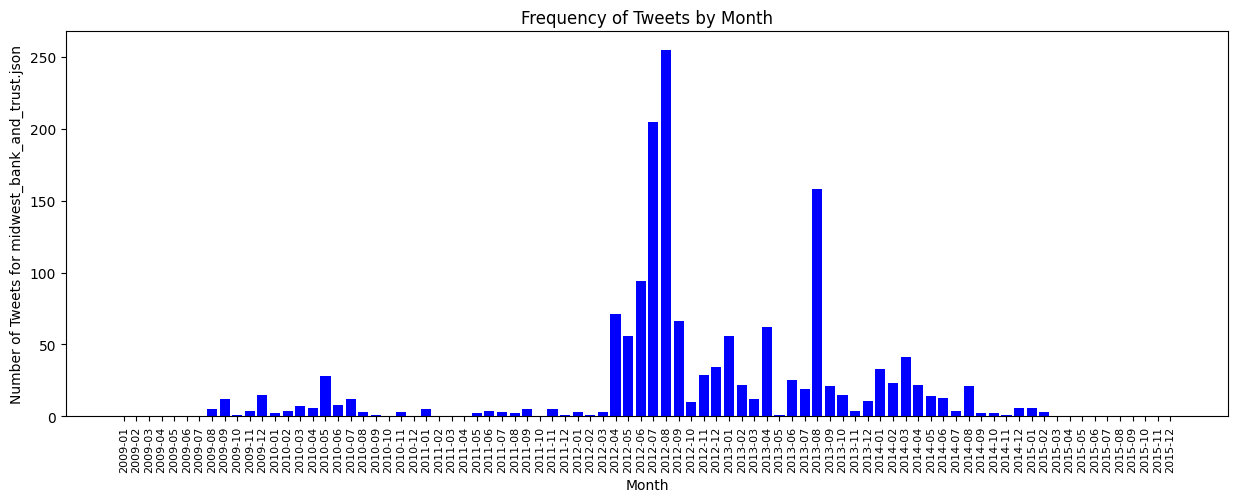

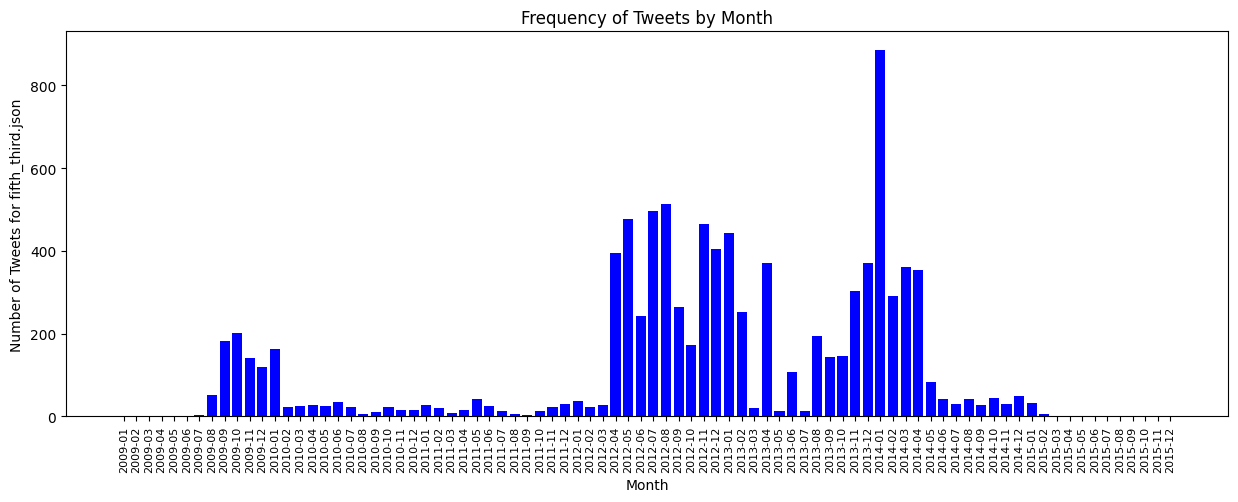

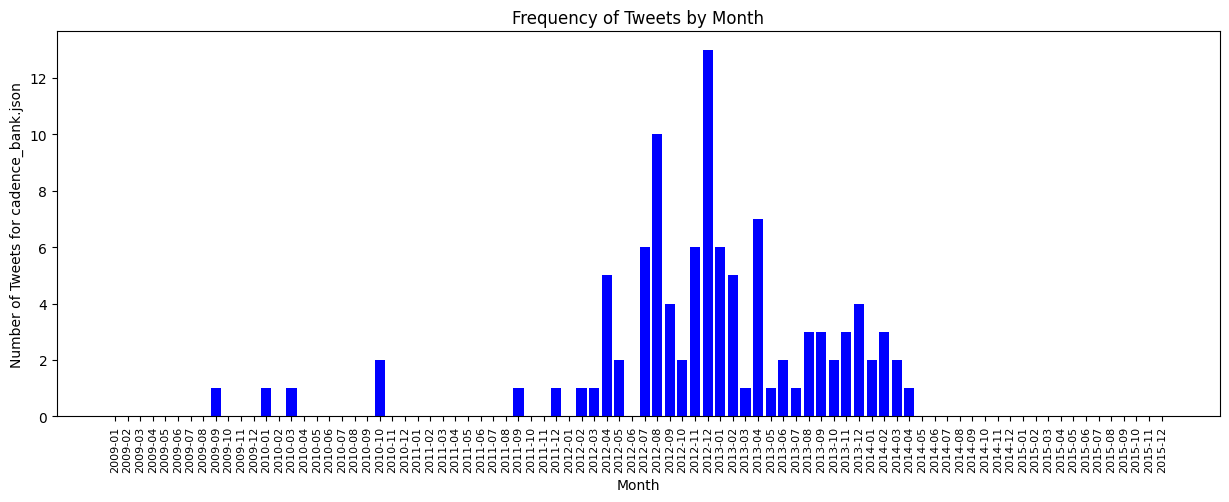

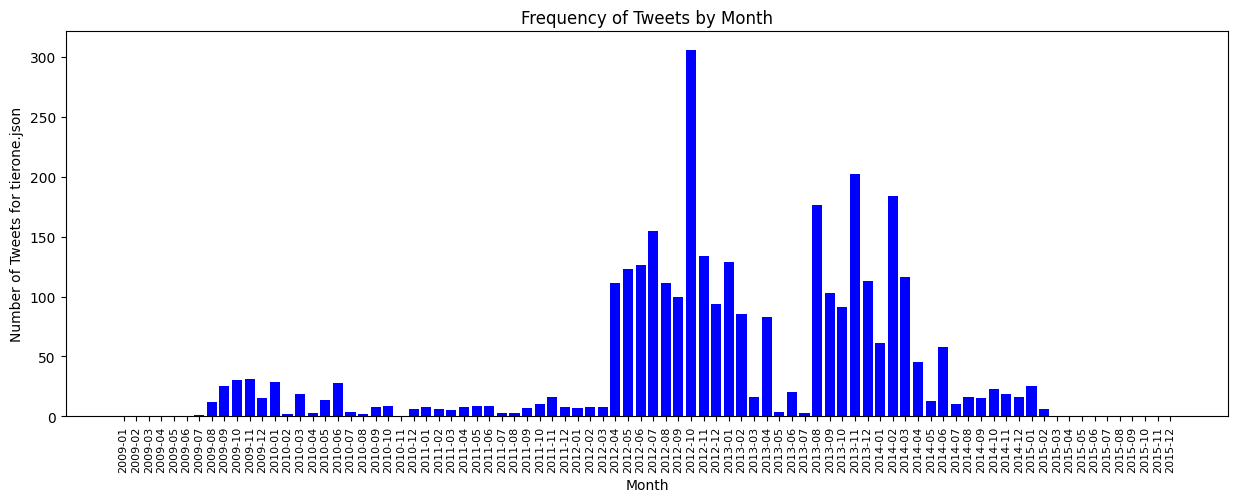

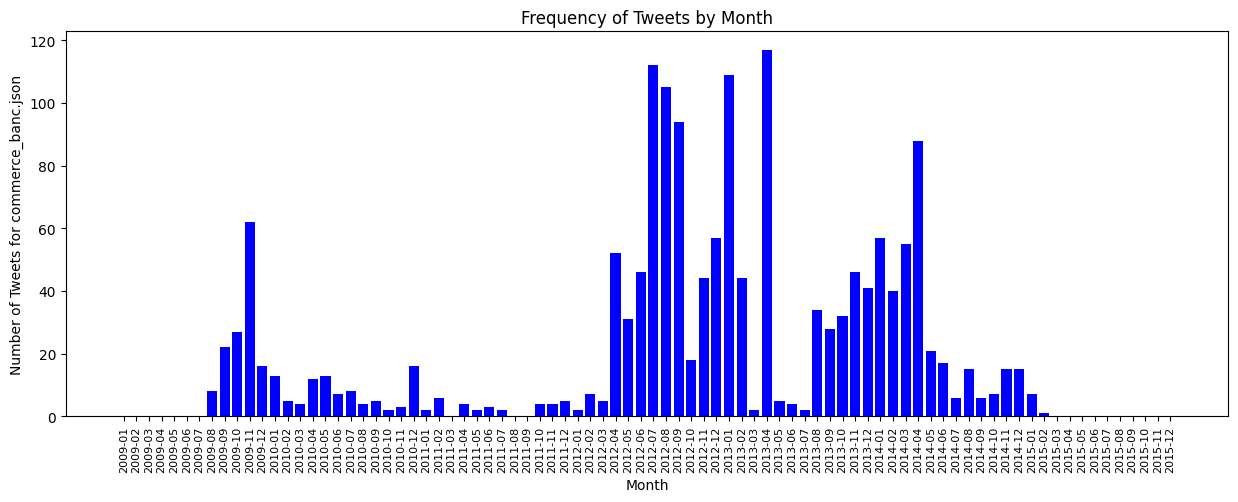

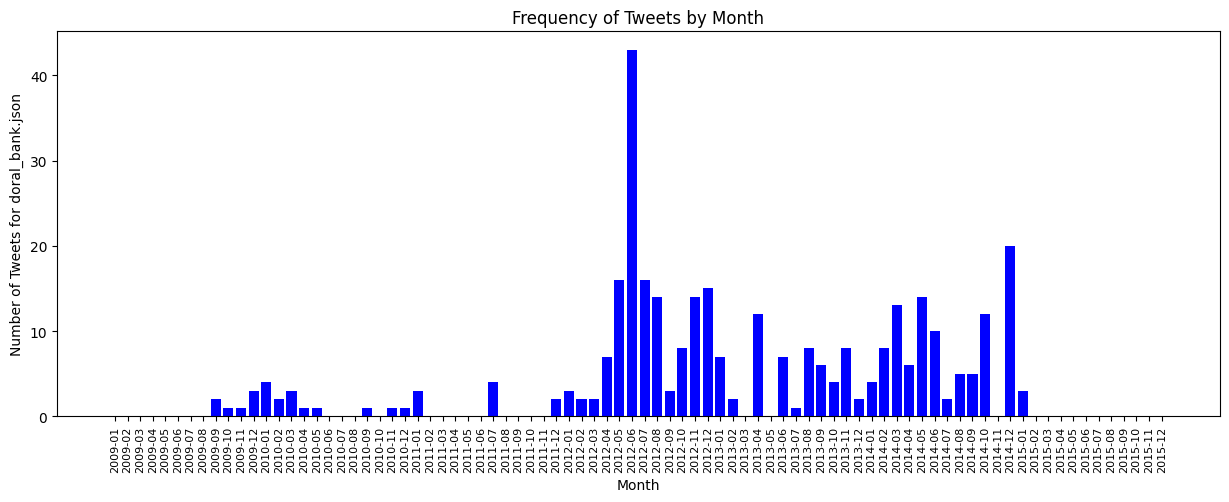

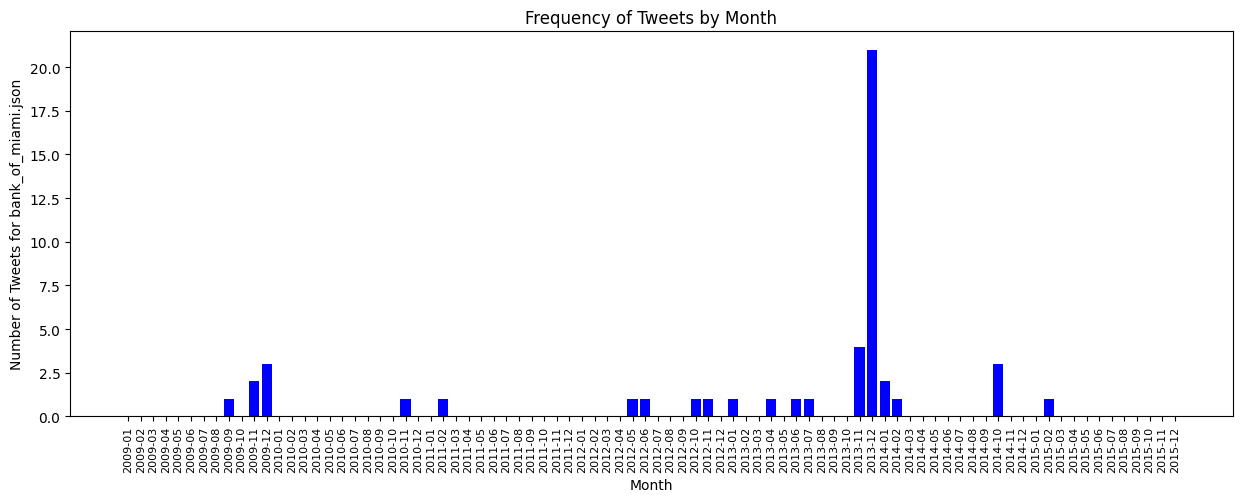

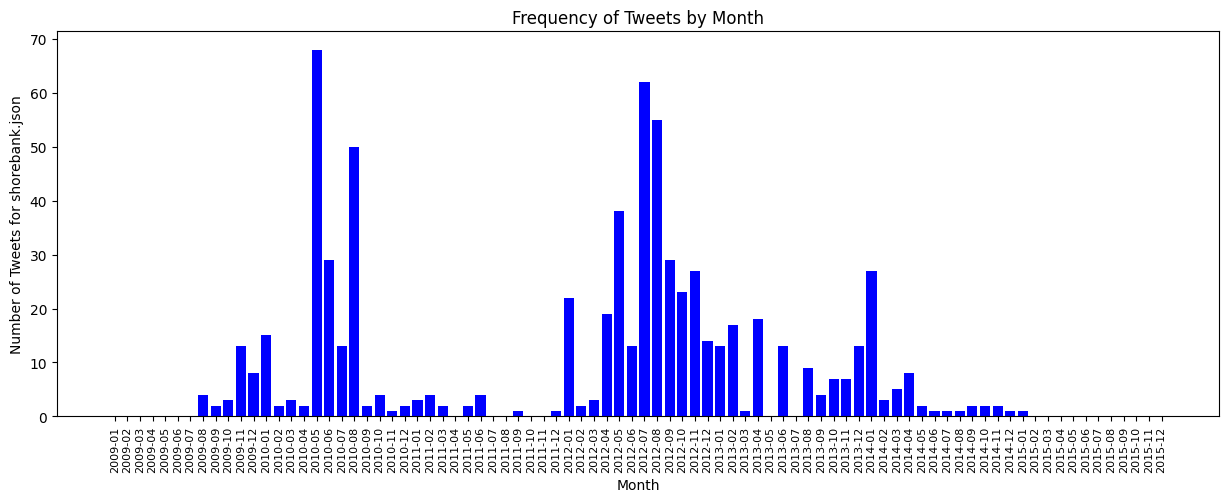

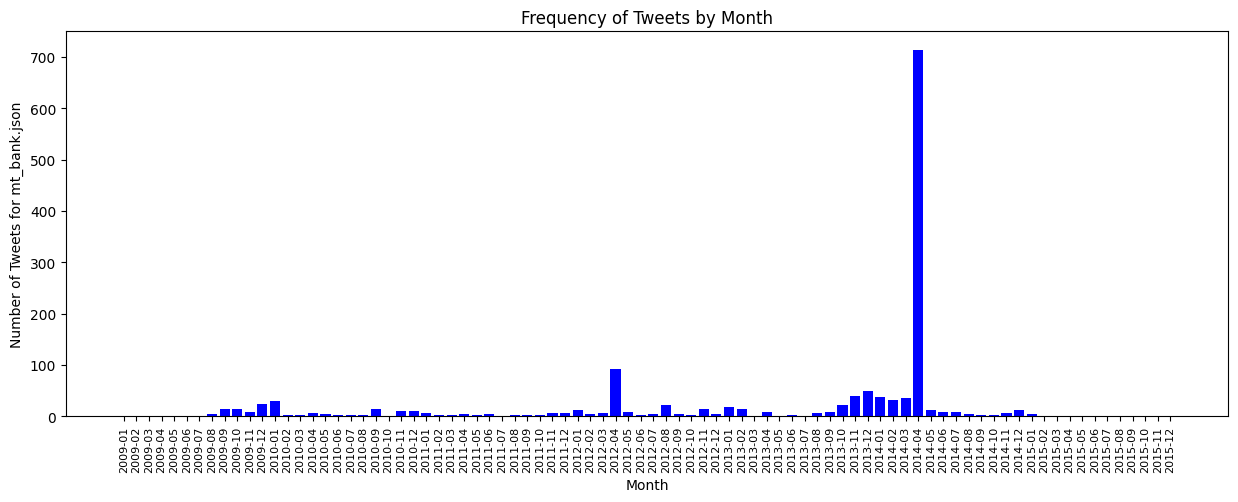

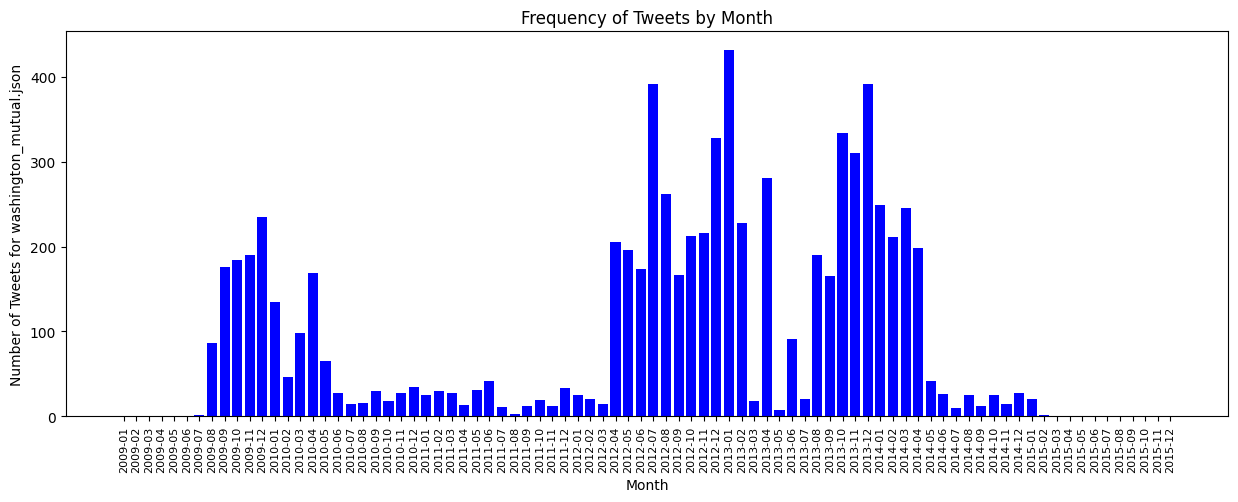

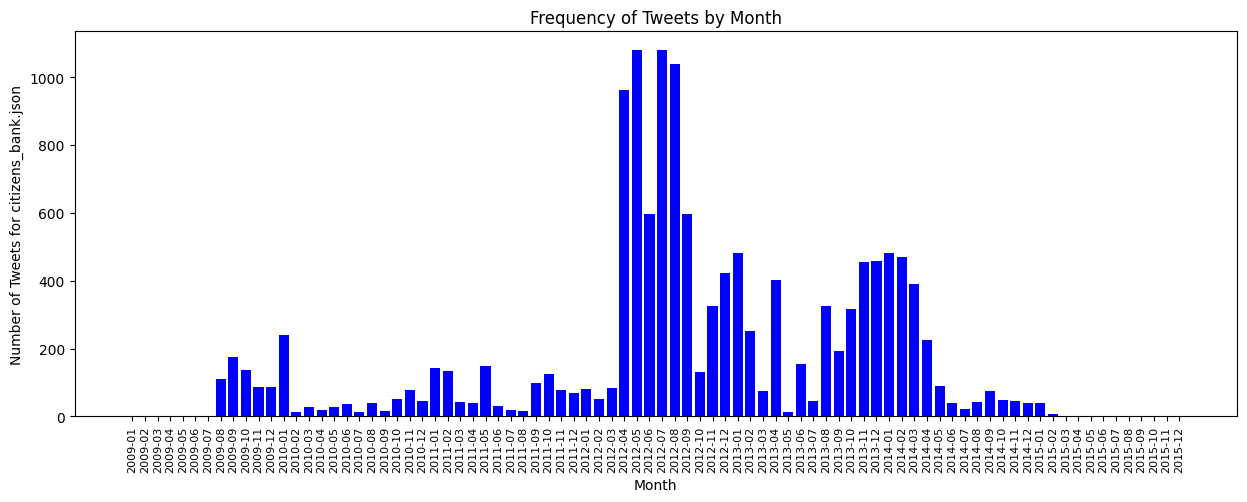

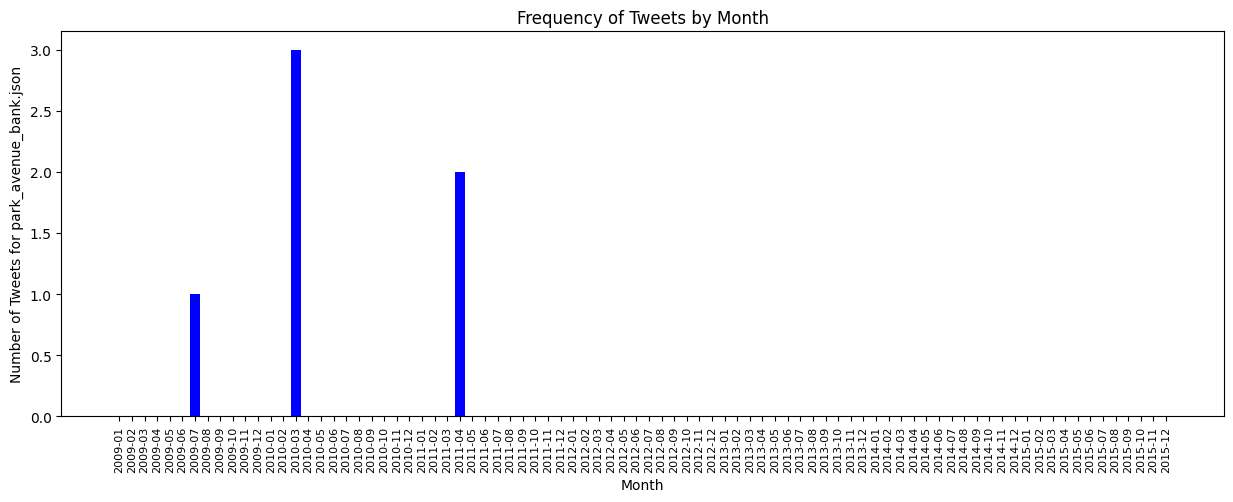

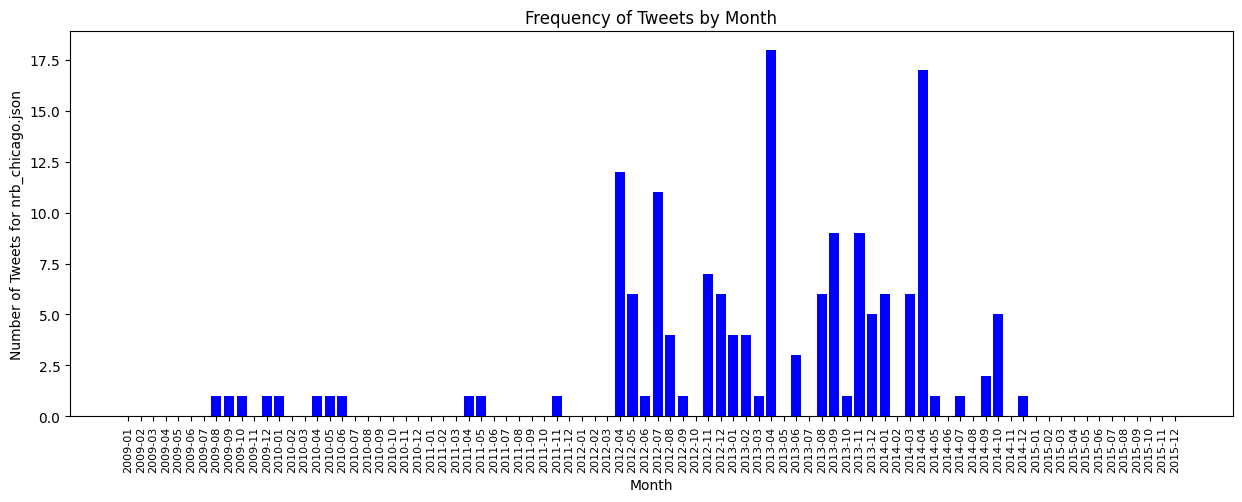

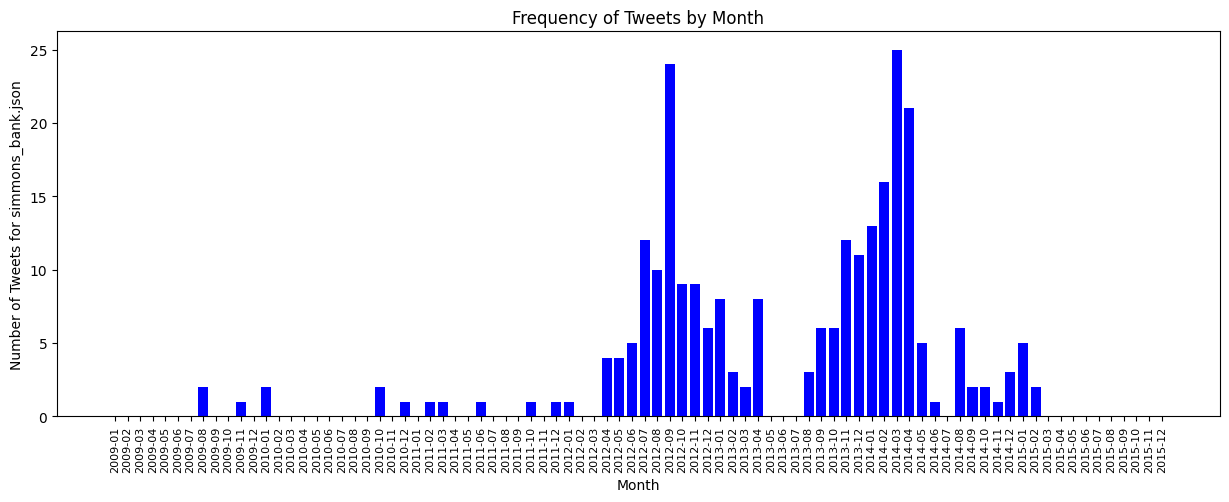

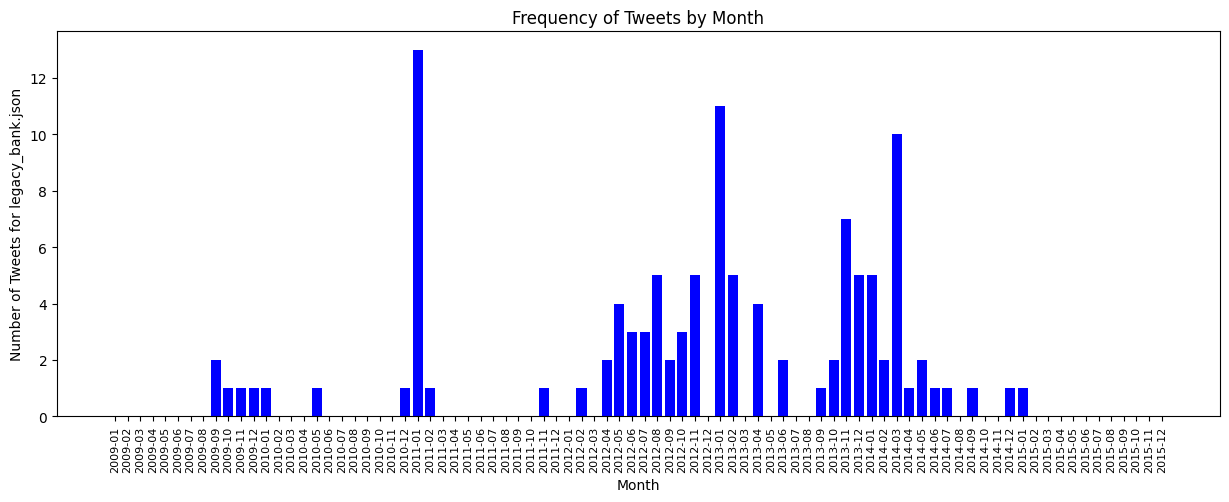

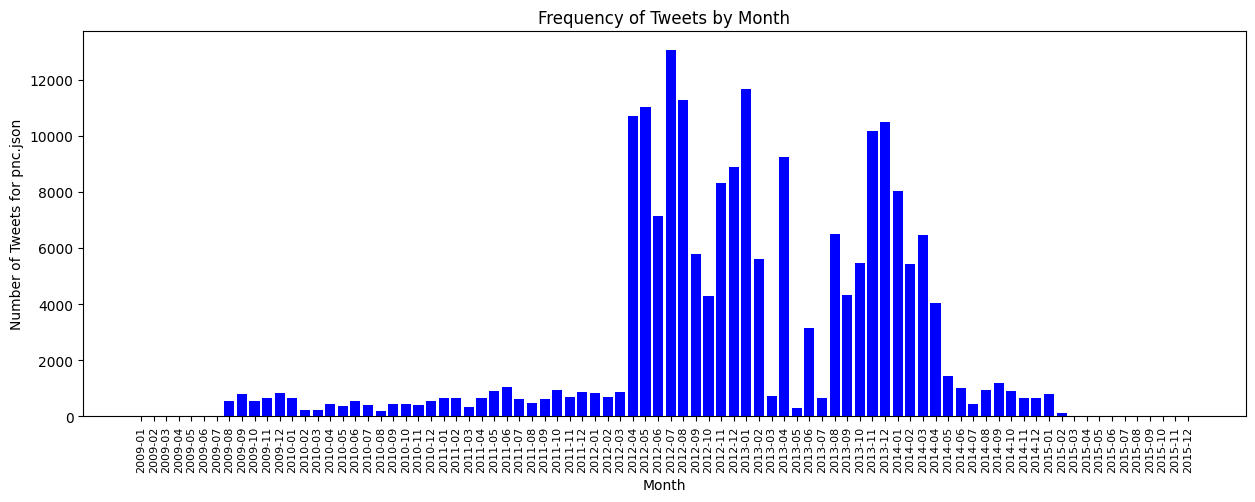

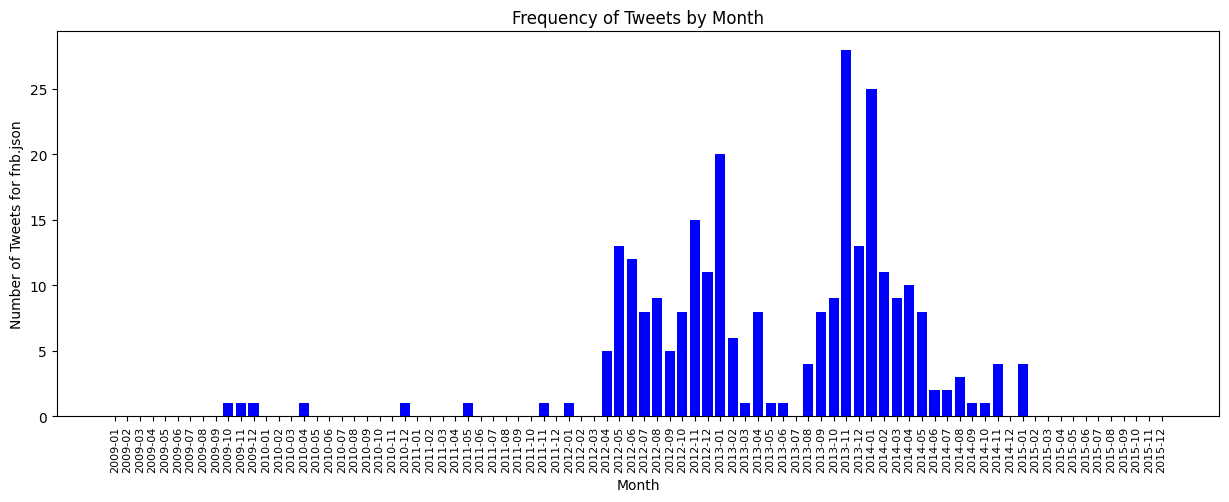

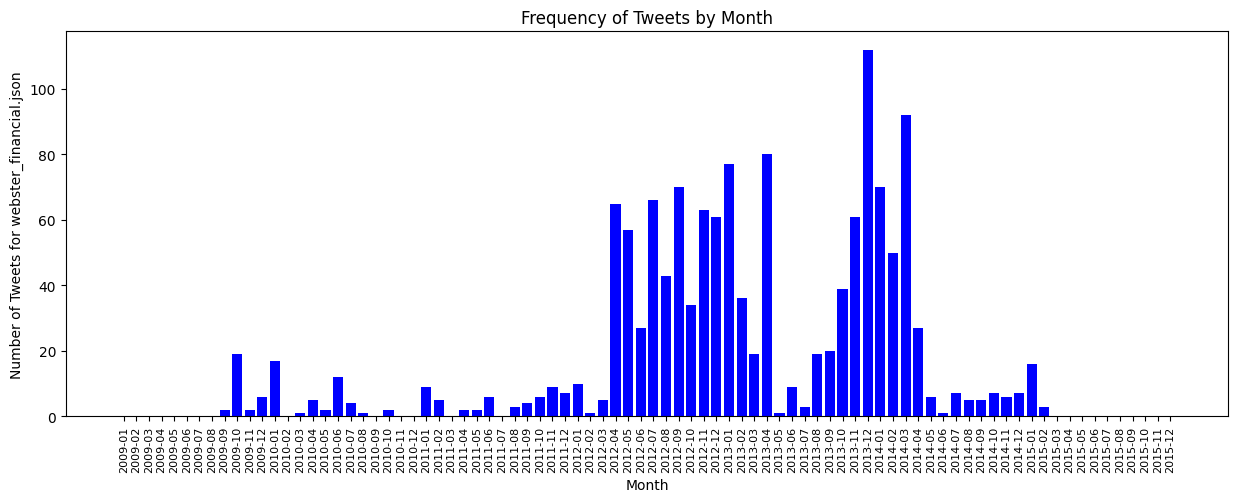

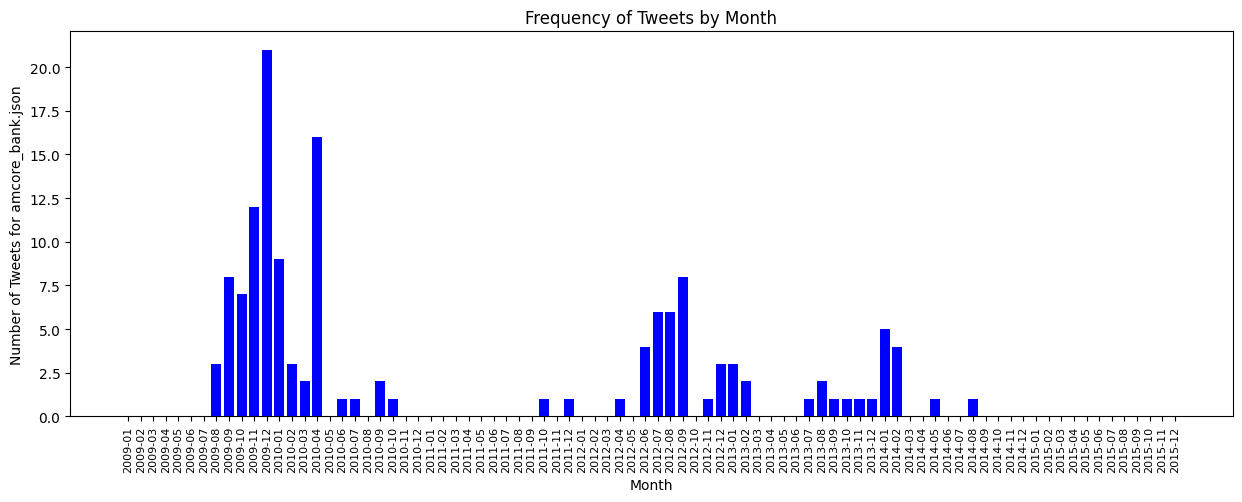

In [17]:
# Bank Months
import matplotlib.pyplot as plt

months = []
for y in range(2009, 2016):
    for m in range(1, 13):
        if len(str(m)) == 1:
            months.append(f"{y}-0{m}")
        else:
            months.append(f"{y}-{m}")

for bank in bank_months:
    freq = [bank_months[bank].get(month, 0) for month in months]

    plt.figure(figsize=(15, 5))
    plt.bar(months, freq, color='blue')
    plt.xlabel('Month')
    plt.ylabel(f"Number of Tweets for {bank}")
    plt.title('Frequency of Tweets by Month')
    plt.xticks(months)
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

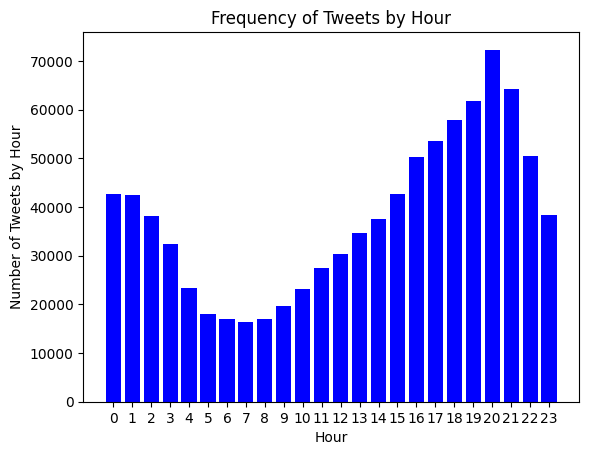

In [18]:
# Tweet Hours
hours = range(0, 24)
freq = [tweet_hours.get(hour, 0) for hour in hours]

plt.bar(hours, freq, color='blue')
plt.xlabel('Hour')
plt.ylabel(f"Number of Tweets by Hour")
plt.title('Frequency of Tweets by Hour')
plt.xticks(hours)
plt.show()

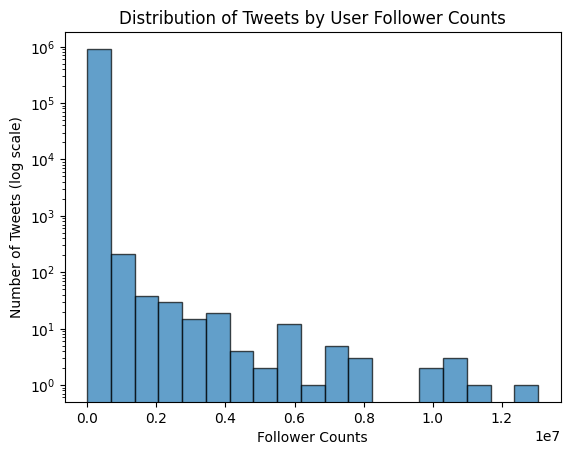

In [19]:
import numpy as np

# User Followers
bins = np.linspace(min(followers), max(followers), 20)

# Plotting the histogram
plt.hist(followers, bins=bins, edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Distribution of Tweets by User Follower Counts')
plt.xlabel('Follower Counts')
plt.ylabel('Number of Tweets (log scale)')
plt.yscale('log')

# Show the plot
plt.show()